In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import joblib  # Library for saving and loading models

# Load the dataset
file_path = '/content/drive/MyDrive/Amikom/AI/datarumah2.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1', on_bad_lines='skip')

# Cetak beberapa baris pertama untuk memahami struktur data
print(df.head())

# Cetak jumlah kolom
print("Number of columns:", len(df.columns))

   NO                                         NAMA RUMAH       HARGA   LB  \
0   1  Rumah Murah Hook Tebet Timur Tebet Jakarta Sel...  3800000000  220   
1   2  Rumah Modern di Tebet dekat Stasiun Tebet Jaka...  4600000000  180   
2   3  Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet Te...  3000000000  267   
3   4             Rumah Baru Tebet Tebet Jakarta Selatan   430000000   40   
4   5  Rumah Bagus Tebet komp Gudang Peluru lt 350m T...  9000000000  400   

    LT  KT  KM  GRS  
0  220   3   3    0  
1  137   4   3    2  
2  250   4   4    4  
3   25   2   2    0  
4  355   6   5    3  
Number of columns: 8


In [68]:
# Rename the columns to make them easier to work with
df.columns = ['NO', 'NAMA', 'HARGA', 'LB', 'LT', 'KT', 'KM', 'GRS']

# Drop the rows with any missing values to clean the data
df = df.dropna()

In [69]:
# Ubah kolom yang relevan menjadi nilai numerik
df['HARGA'] = pd.to_numeric(df['HARGA'], errors='coerce')
df['LB'] = pd.to_numeric(df['LB'], errors='coerce')
df['LT'] = pd.to_numeric(df['LT'], errors='coerce')
df['KT'] = pd.to_numeric(df['KT'], errors='coerce')
df['KM'] = pd.to_numeric(df['KM'], errors='coerce')

# Hapus baris dengan nilai NaN yang tersisa setelah konversi
df = df.dropna()

# Menampilkan data yang sudah dibersihkan
df.head()

,NO,NAMA,HARGA,LB,LT,KT,KM,GRS
0,1,Rumah Murah Hook Tebet Timur Tebet Jakarta Sel...,3800000000,220,220,3,3,0
1,2,Rumah Modern di Tebet dekat Stasiun Tebet Jaka...,4600000000,180,137,4,3,2
2,3,Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet Te...,3000000000,267,250,4,4,4
3,4,Rumah Baru Tebet Tebet Jakarta Selatan,430000000,40,25,2,2,0
4,5,Rumah Bagus Tebet komp Gudang Peluru lt 350m T...,9000000000,400,355,6,5,3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

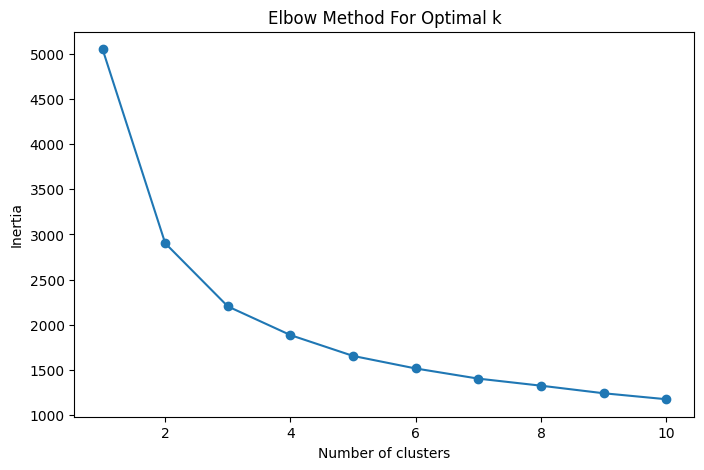

In [ ]:
# Pilih fitur untuk pengelompokan
features = ['HARGA', 'LB', 'LT', 'KT', 'KM']
X = df[features]

# Normalisasikan fitur-fiturnya
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tentukan jumlah cluster yang optimal dengan menggunakan metode siku
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Input jumlah klaster dari pengguna
optimal_clusters = int(input("Masukkan jumlah klaster yang diinginkan: "))


In [ ]:
# Terapkan K-Means dengan jumlah cluster yang dipilih
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Simpan model dan scalernya
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Tampilkan beberapa baris pertama dengan penetapan cluster
df.head()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Muat model dan scaler
kmeans = joblib.load('kmeans_model.pkl')
scaler = joblib.load('scaler.pkl')

# fungsi untuk memprediksi cluster data baru
def predict_cluster(new_data):
    # Konversikan ke DataFrame
    df_new = pd.DataFrame(new_data, columns=['HARGA', 'LB', 'LT', 'KT', 'KM'])

    # Normalisasikan data baru menggunakan scaler yang sama
    X_new_scaled = scaler.transform(df_new)

    # Prediksi clusternya
    clusters = kmeans.predict(X_new_scaled)
    df_new['Cluster'] = clusters

    return df_new

# Masukkan data baru secara interaktif
def input_new_data():
    HARGA = float(input("Masukkan HARGA rumah: "))
    LB = float(input("Masukkan Luas Bangunan (LB): "))
    LT = float(input("Masukkan Luas Tanah (LT): "))
    KT = int(input("Masukkan Jumlah Kamar Tidur (KT): "))
    KM = int(input("Masukkan Jumlah Kamar Mandi (KM): "))

    new_data = [[HARGA, LB, LT, KT, KM]]
    return new_data

# Dapatkan data baru dari input pengguna
new_data = input_new_data()

# Prediksi cluster untuk data baru
predicted_clusters = predict_cluster(new_data)
print(predicted_clusters)
